# Sami Almuallim

## Research question/interests

**How are the different metrics of pride represented in this data set correlated?** Answering this question will provide a foundation upon which we can work to answer the more complicated questions that follow.

- This will probably be the simplest research question, requiring only the data contained in our original data set. To explore this topic, we will use different visualization methods discussed in class to develop a better understanding of the data.

**Is there a positive or a negative correlation between taxes paid and the pride of a given queer neighbourhood?** Taxes are influenced by a variety of socio-economic factors and we hope that in analyzing both tax data and our quantification of queerness on a geographic level, we'll be able to gleam insight into the question of how queerness and class are interrelated.

- Similar again to the first research question posed, we'll need to find another data set containing geographically located tax data, which should be easy to acquire from the US government (for example, [in our cursory research, we found this data set from the IRS](https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2018-zip-code-data-soi)).
- This would bring the number of data sets used in this project up to three, which might present some challenges in terms of the amount of data wrangling necessary to bring it all together.
- To measure this, we would rank the neighbourhoods presented in the gaybourhoods data set by pride (an open question which we will explore in a separate research question)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

gaybourhoods = pd.read_csv("../data/raw/gaybourhoods.csv")
gaybourhoods.head(5)

,GEOID10,Tax_Mjoint,Mjoint_MF,Mjoint_SS,Mjoint_FF,Mjoint_MM,TaxRate_SS,TaxRate_FF,TaxRate_MM,Cns_TotHH,...,FF_Cns,FF_Index,MM_Tax,MM_Cns,MM_Index,SS_Index,SS_Index_Weight,Parade_Weight,Bars_Weight,TOTINDEX
0,90069,2120,1689,431,61,370,203.301887,28.773585,174.528302,12551,...,1.847099,6.724415,29.583721,18.704533,48.288254,55.012669,39.429995,10,17.647059,67.077054
1,94114,5080,4036,1044,170,874,205.511811,33.464567,172.047244,16456,...,4.161579,9.834048,29.163165,19.415304,48.578469,58.412517,41.866815,0,20.000000,61.866815
2,10011,5790,5166,624,97,527,107.772021,16.753022,91.018998,29762,...,1.531029,4.370779,15.428332,10.932081,26.360413,30.731192,22.026394,10,5.882353,37.908747
3,10014,3510,3229,281,74,207,80.056980,21.082621,58.974359,18786,...,2.482293,6.055939,9.996551,5.943318,15.939869,21.995808,15.765361,10,11.764706,37.530067
4,94103,2660,2417,243,34,209,91.353383,12.781955,78.571429,12728,...,0.837431,3.004058,13.318386,4.961779,18.280165,21.284224,15.255337,10,10.588235,35.843573


## Data wrangling

In [2]:
# NOTE: This cell will not work unless this file is in the repository. The source
# can be found linked in the references section of the readme, however, it is too
# big for GitHub to handle.

irs = pd.read_csv("../data/raw/irs_2015.csv")

# Naively splitting the IRS data set in two. More formal data wrangling will
# come later
irs1 = irs.head(int(irs.shape[0] / 2))
irs2 = irs.tail(int(irs.shape[0] / 2))

irs1.to_csv("../data/processed/irs_2015_1", index=False)
irs2.to_csv("../data/processed/irs_2015_2", index=False)

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/irs_2015.csv'

In [3]:
# Now these two datasets can be joined and worked with
irs = pd.concat([
    pd.read_csv("../data/processed/irs_2015_1"),
    pd.read_csv("../data/processed/irs_2015_2")
])
# irs.head()


#selected data: ZIPCODE - this will be used in conjunction with the rest of the set
            #   N2 - population of zip code
            
            #data of intrest
                #     A11900	Total overpayments amount
                #   AGI_STUB - metric for income

# print(irs.loc[irs['zipcode']==90069])
# df = {irs['zipcode'], irs['N2']}



In [4]:
#wrangle tax
taxdf = pd.DataFrame(zip(irs['zipcode'], irs['N2'], irs['agi_stub'], irs['A11901']))
taxdf.columns=('zip', 'population', 'income', 'overall tax paid')
print(taxdf.describe())
print(taxdf)
# print(irs.columns)

                 zip    population        income  overall tax paid
count  166698.000000  1.666980e+05  166698.00000      1.666980e+05
mean    48877.636432  3.432536e+03       3.50000      1.844871e+03
std     27146.337114  6.676873e+04       1.70783      5.785610e+04
min         0.000000  0.000000e+00       1.00000      0.000000e+00
25%     27040.000000  1.400000e+02       2.00000      1.600000e+01
50%     48879.000000  5.100000e+02       3.50000      1.440000e+02
75%     70607.000000  2.000000e+03       5.00000      6.310000e+02
max     99999.000000  9.566490e+06       6.00000      1.557123e+07
          zip  population  income  overall tax paid
0           0   1356760.0       1           48150.0
1           0   1010990.0       2          107304.0
2           0    583910.0       3          139598.0
3           0    423990.0       4          128823.0
4           0    589490.0       5          421004.0
...       ...         ...     ...               ...
166693  99999      6660.0       2

In [5]:
#wrangle gay
gaydf = pd.DataFrame(zip(gaybourhoods['GEOID10'], gaybourhoods['Tax_Mjoint']))
gaydf.columns=(('zip', 'gay tax rate'))

print(gaydf.describe())
print(gaydf)

# gaybourhoods.columns

                zip  gay tax rate
count   2328.000000   2328.000000
mean   48616.478522   4103.440722
std    35481.240641   3140.699446
min     1730.000000      0.000000
25%    11362.750000   1767.500000
50%    46351.000000   3635.000000
75%    80234.250000   5745.000000
max    98686.000000  24560.000000
        zip  gay tax rate
0     90069          2120
1     94114          5080
2     10011          5790
3     10014          3510
4     94103          2660
...     ...           ...
2323  97208             0
2324  98154             0
2325  98158             0
2326  98174             0
2327  98195             0

[2328 rows x 2 columns]


In [6]:
#merge
df = pd.merge(taxdf, gaydf)

# print(df)

df2 = df.groupby(df['zip']).aggregate({ 'zip':'first',
                                        'population': 'sum',
                                        'gay tax rate':'first',
                                        'overall tax paid':'first',
                                        'income':'first'
                                                                })

print(df2.describe())
print("------------------------------------------------------------------------")
print(df2)

df2.to_csv("../data/processed/tax_and_gay.csv")


                zip     population  gay tax rate  overall tax paid  income
count   2184.000000    2184.000000   2184.000000       2184.000000  2184.0
mean   48935.203297   26691.730769   4373.997253        596.719322     1.0
std    35451.335807   17960.713867   3054.620840        615.174358     0.0
min     1730.000000     160.000000      0.000000          0.000000     1.0
25%    11360.750000   13337.500000   2110.000000        217.000000     1.0
50%    60023.500000   24070.000000   3900.000000        434.000000     1.0
75%    80227.250000   35640.000000   5902.500000        777.250000     1.0
max    98686.000000  114420.000000  24560.000000       9166.000000     1.0
------------------------------------------------------------------------
         zip  population  gay tax rate  overall tax paid  income
zip                                                             
1730    1730     13570.0          3260             150.0       1
1731    1731      2450.0           550               0.0 

In [7]:
## take the dataset & add long/lat
## props to Nat for creating the backbone I used to zipcode -> long/lat

cords = pd.read_csv("../data/raw/zip_lat_long.csv")
gaydf = pd.read_csv("../data/processed/tax_and_gay.csv")

# Let's add long/lat columns to gb
gaydf = gaydf.merge(cords, left_on="zip", right_on="ZIP")

# // unneded was already filtered out

# There's a lot of info baked into some of these columns. Especially the composite indexes.
# We'll leave their names as is for easy reference even if they're a little ugly.
gaydf = gaydf.rename({
    "LAT": "lat",
    "LNG": "long",
}, axis="columns")

# gb.to_csv("../data/processed/gaybourhoods-nat.csv")
# gb.head()

# unperson unneccesary zip codes
del gaydf['zip.1']
del gaydf['ZIP']

print(gaydf.describe())
print("------------------------------------------------------------------------")
print(gaydf)

                zip     population  gay tax rate  overall tax paid  income  \
count   2184.000000    2184.000000   2184.000000       2184.000000  2184.0   
mean   48935.203297   26691.730769   4373.997253        596.719322     1.0   
std    35451.335807   17960.713867   3054.620840        615.174358     0.0   
min     1730.000000     160.000000      0.000000          0.000000     1.0   
25%    11360.750000   13337.500000   2110.000000        217.000000     1.0   
50%    60023.500000   24070.000000   3900.000000        434.000000     1.0   
75%    80227.250000   35640.000000   5902.500000        777.250000     1.0   
max    98686.000000  114420.000000  24560.000000       9166.000000     1.0   

               lat         long  
count  2184.000000  2184.000000  
mean     38.016518   -91.296804  
std       5.210272    18.476699  
min      25.572213  -123.118977  
25%      33.997027  -105.037767  
50%      39.930150   -87.603617  
75%      40.960828   -74.310179  
max      47.916786   -70.

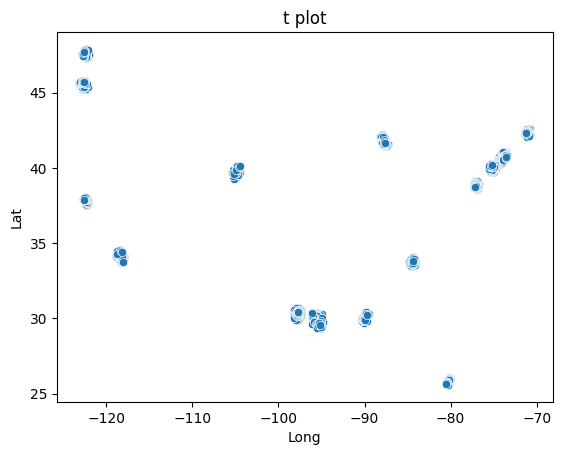

In [8]:

#compare taxes paid by queers to taxes paid by general

plot1 = sns.scatterplot(data=gaydf, x="long", y="lat")
_ = plot1.set(xlabel="Long", ylabel="Lat", title="t plot")

In [ ]:
#the next step is to compare the gay data to the typical data, so the following models are used to compare the taxes each group paid

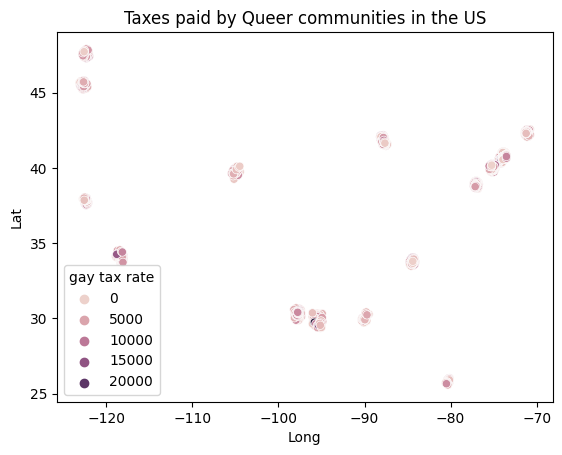

In [59]:

gaydfgaytaxplot = gaydf.copy()

# gaydf.head()

del gaydfgaytaxplot['zip']
del gaydfgaytaxplot['population']
del gaydfgaytaxplot['overall tax paid']
del gaydfgaytaxplot['income']
# del gaydfgaytaxplot['gay tax rate']

plot2 = sns.scatterplot(data=gaydfgaytaxplot, x="long", y="lat", hue='gay tax rate')
_ = plot2.set(xlabel="Long", ylabel="Lat", title="Taxes paid by Queer communities in the US")


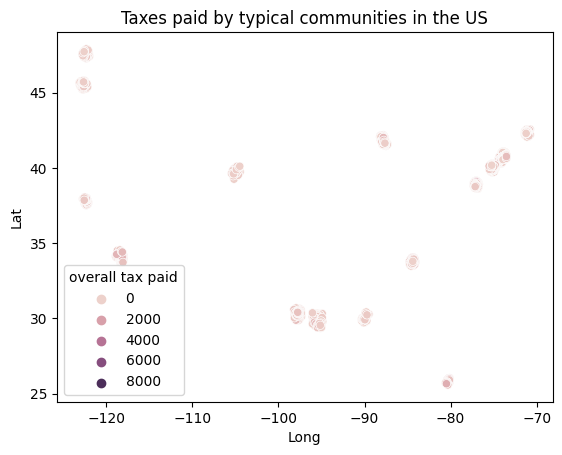

In [57]:
gaydfgentaxplot = gaydf.copy()

# gaydf.head()

del gaydfgentaxplot['zip']
del gaydfgentaxplot['population']
# del gaydfgentaxplot['overall tax paid']
del gaydfgentaxplot['income']
# del gaydfgaytaxplot['gay tax rate']

plot2 = sns.scatterplot(data=gaydfgentaxplot, x="long", y="lat", hue='overall tax paid')
_ = plot2.set(xlabel="Long", ylabel="Lat", title="Taxes paid by typical communities in the US")

In [64]:
gaydfhybridplot = pd.merge(gaydfgentaxplot, gaydfgaytaxplot)

gaydfhybridplot.describe()


,gay tax rate,overall tax paid,lat,long
count,2184.000000,2184.000000,2184.000000,2184.000000
mean,4373.997253,596.719322,38.016518,-91.296804
std,3054.620840,615.174358,5.210272,18.476699
min,0.000000,0.000000,25.572213,-123.118977
25%,2110.000000,217.000000,33.997027,-105.037767
50%,3900.000000,434.000000,39.930150,-87.603617
75%,5902.500000,777.250000,40.960828,-74.310179
max,24560.000000,9166.000000,47.916786,-70.758184


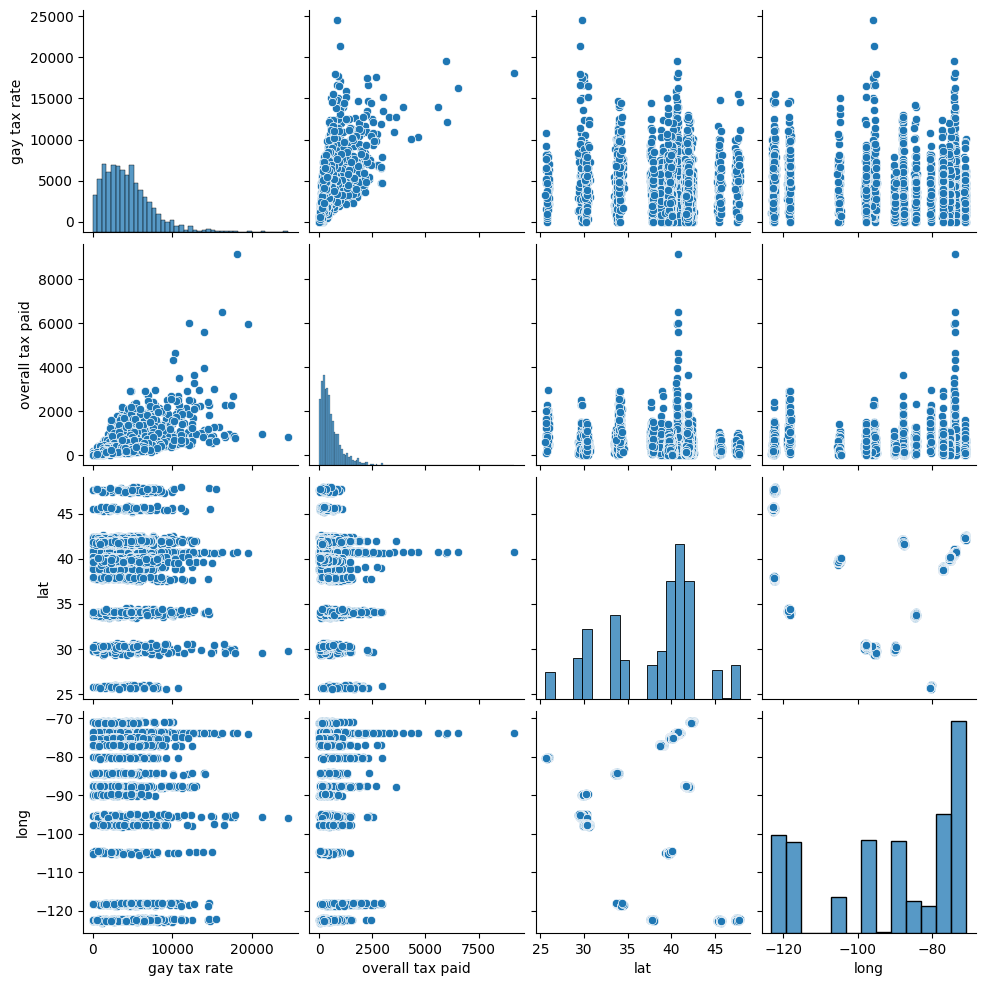

In [65]:
sns.pairplot(gaydfhybridplot)

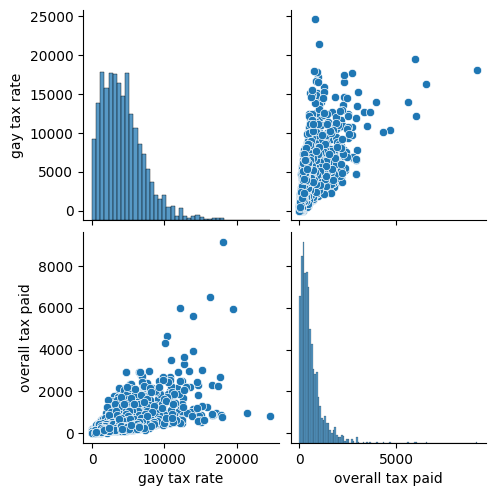

In [66]:
gaydflight = gaydfhybridplot.copy()

del gaydflight['lat']; del gaydflight['long']

sns.pairplot(gaydflight)


In [ ]:
# as we can infer by taking the first derivative of the corelation line of this graph, queer communities pay significantly more taxes then typical neighborhoods

# an explanation for this is queer people through one mechanism or another (queer folk being more likely to be politically progressive, live in cities, or get educations for example) end up corelating strongly with demographics who pay more tax

# due note that the analysis is severely limited by severe sampling bias as only hyper urban geographical stratum have been surveyed by gayborhoods